# NAIVE BAYES: PULSAR DATASET

## Q1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

## Q2. Import dataset

In [37]:
a=pd.read_csv('pulsar_data.csv')

## Q3. Explore the data to gain insights about the data

In [38]:
a.shape

(12528, 9)

In [39]:
a.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [40]:
a.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [41]:
a.columns=a.columns.str.strip()
a.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [42]:
a.rename(columns={
    'Mean of the integrated profile': 'mean_integrated_profile',
    'Standard deviation of the integrated profile': 'std_dev_integrated_profile',
    'Excess kurtosis of the integrated profile': 'excess_kurtosis_integrated_profile',
    'Skewness of the integrated profile': 'skewness_integrated_profile',
    'Mean of the DM-SNR curve': 'mean_dmsnr_curve',
    'Standard deviation of the DM-SNR curve': 'std_dev_dmsnr_curve',
    'Excess kurtosis of the DM-SNR curve': 'excess_kurtosis_dmsnr_curve',
    'Skewness of the DM-SNR curve': 'skewness_dmsnr_curve'
}, inplace=True)


In [43]:
a.columns

Index(['mean_integrated_profile', 'std_dev_integrated_profile',
       'excess_kurtosis_integrated_profile', 'skewness_integrated_profile',
       'mean_dmsnr_curve', 'std_dev_dmsnr_curve',
       'excess_kurtosis_dmsnr_curve', 'skewness_dmsnr_curve', 'target_class'],
      dtype='object')

In [45]:
a.describe()

,mean_integrated_profile,std_dev_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr_curve,std_dev_dmsnr_curve,excess_kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [46]:
a.isnull().sum()

mean_integrated_profile                  0
std_dev_integrated_profile               0
excess_kurtosis_integrated_profile    1735
skewness_integrated_profile              0
mean_dmsnr_curve                         0
std_dev_dmsnr_curve                   1178
excess_kurtosis_dmsnr_curve              0
skewness_dmsnr_curve                   625
target_class                             0
dtype: int64

In [47]:
a.isnull().sum()/len(a)*100

mean_integrated_profile                0.000000
std_dev_integrated_profile             0.000000
excess_kurtosis_integrated_profile    13.848978
skewness_integrated_profile            0.000000
mean_dmsnr_curve                       0.000000
std_dev_dmsnr_curve                    9.402937
excess_kurtosis_dmsnr_curve            0.000000
skewness_dmsnr_curve                   4.988825
target_class                           0.000000
dtype: float64

In [48]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mean_integrated_profile             12528 non-null  float64
 1   std_dev_integrated_profile          12528 non-null  float64
 2   excess_kurtosis_integrated_profile  10793 non-null  float64
 3   skewness_integrated_profile         12528 non-null  float64
 4   mean_dmsnr_curve                    12528 non-null  float64
 5   std_dev_dmsnr_curve                 11350 non-null  float64
 6   excess_kurtosis_dmsnr_curve         12528 non-null  float64
 7   skewness_dmsnr_curve                11903 non-null  float64
 8   target_class                        12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [49]:
a['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

([<matplotlib.patches.Wedge at 0x1eb79fbe910>,
 [Text(-1.0543406083257068, 0.31363335542537385, '0'),
  Text(1.0543405863023487, -0.31363342946124195, '1')],
 [Text(-0.5750948772685672, 0.17107273932293116, '91%'),
  Text(0.5750948652558264, -0.17107277970613194, '9%')])

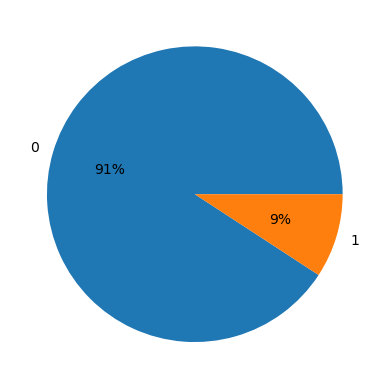

In [50]:
plt.pie(a['target_class'].value_counts()/len(a)*100,labels=['0','1'],autopct='%1.0f%%')

In [51]:
a=a.replace('?',np.nan)

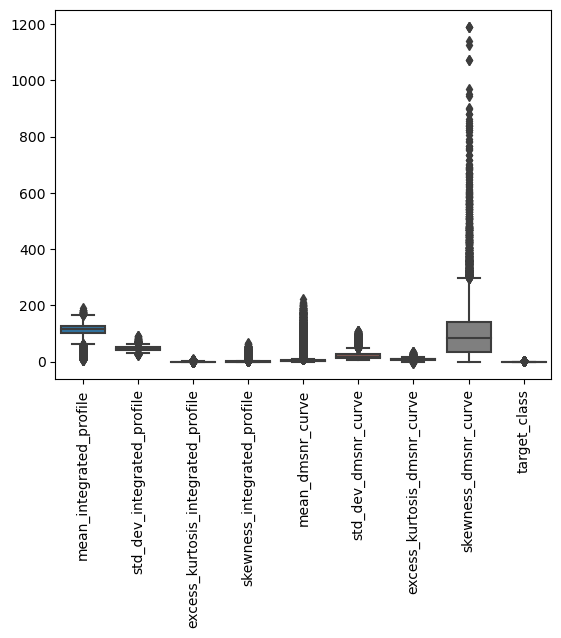

In [52]:
sns.boxplot(data=a)
plt.xticks(rotation=90)
plt.show()

In [53]:
a.head()

,mean_integrated_profile,std_dev_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr_curve,std_dev_dmsnr_curve,excess_kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## Q4. Impute missing categorical variables with the most frequent value

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
a['excess_kurtosis_integrated_profile']=imputer.fit_transform(a[['excess_kurtosis_integrated_profile']])
a['std_dev_dmsnr_curve']=imputer.fit_transform(a[['std_dev_dmsnr_curve']])
a['skewness_dmsnr_curve']=imputer.fit_transform(a[['skewness_dmsnr_curve']])

In [57]:
a.isnull().sum()/len(a)*100

mean_integrated_profile               0.0
std_dev_integrated_profile            0.0
excess_kurtosis_integrated_profile    0.0
skewness_integrated_profile           0.0
mean_dmsnr_curve                      0.0
std_dev_dmsnr_curve                   0.0
excess_kurtosis_dmsnr_curve           0.0
skewness_dmsnr_curve                  0.0
target_class                          0.0
dtype: float64

Q3 Check the distribution of variables

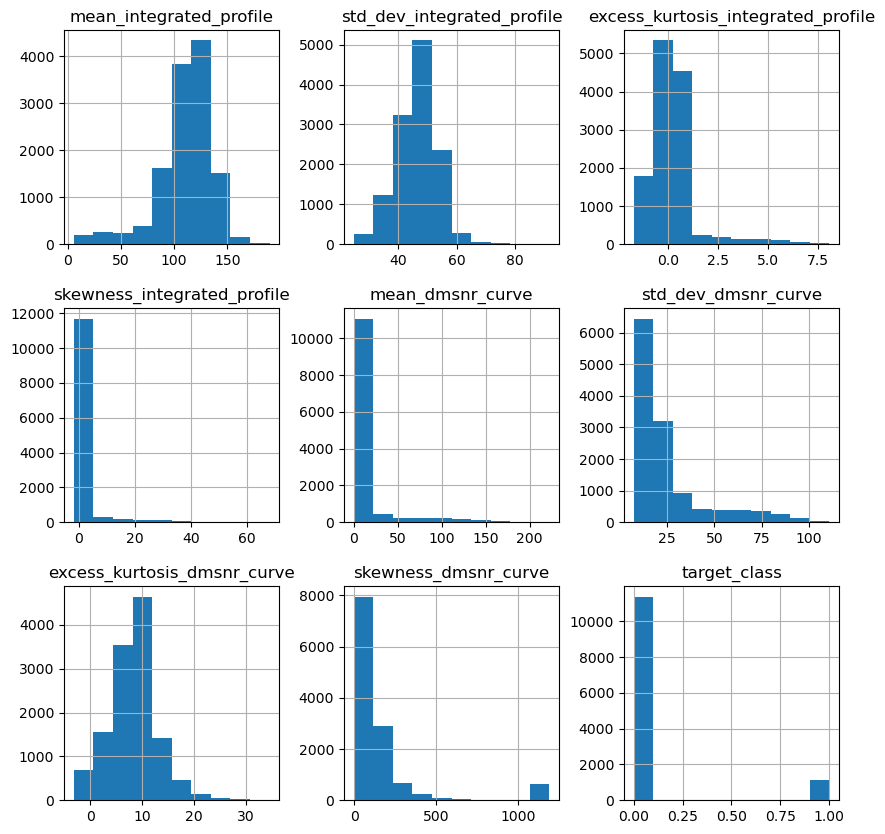

In [58]:
a.hist(figsize=(10,10))
plt.show()

## Q5. Feature Scaling

In [63]:
y=a['target_class']
a.drop('target_class',axis=1,inplace=True)

In [64]:
x=a
x

,mean_integrated_profile,std_dev_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr_curve,std_dev_dmsnr_curve,excess_kurtosis_dmsnr_curve,skewness_dmsnr_curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,7.370432,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12524,115.617188,46.784600,0.218177,0.226757,6.140468,7.370432,5.732201,34.357283
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.39398903,  0.27225212,  0.1631161 , ..., -0.31675259,
        -0.19481754, -0.3656857 ],
       [-1.32725743, -1.52127273,  0.43302828, ..., -0.35929842,
         0.23837256, -0.22035503],
       [ 0.76130595,  0.98636783, -0.03053182, ..., -0.11319969,
         0.038556  , -0.33136058],
       ...,
       [ 0.19435365, -0.48635278,  0.39347723, ..., -0.66452854,
         1.92294752,  0.59011047],
       [ 0.95911539,  0.50175114, -0.20919853, ..., -0.15742391,
        -0.20616758, -0.37661647],
       [ 0.37725131,  0.58093396,  0.13967243, ..., -0.65608207,
         2.05677923,  0.65721173]])

## Q6. Split data into separate training and test set

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2,random_state=42)

## Q7. Model training

In [67]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

## Q8. Predict the results

In [68]:
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

## Q9 Check the accuracy score                                                                                                            Q10 Compare the train-set and test-set accuracy

In [69]:
accuracy_test= accuracy_score(y_test, y_pred_test)
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test,accuracy_train

(0.9433359936153233, 0.944122929554979)

## Q11.Visualize confusion matrix with seaborn heatmap

In [70]:
cm = confusion_matrix(y_test, y_pred_test)

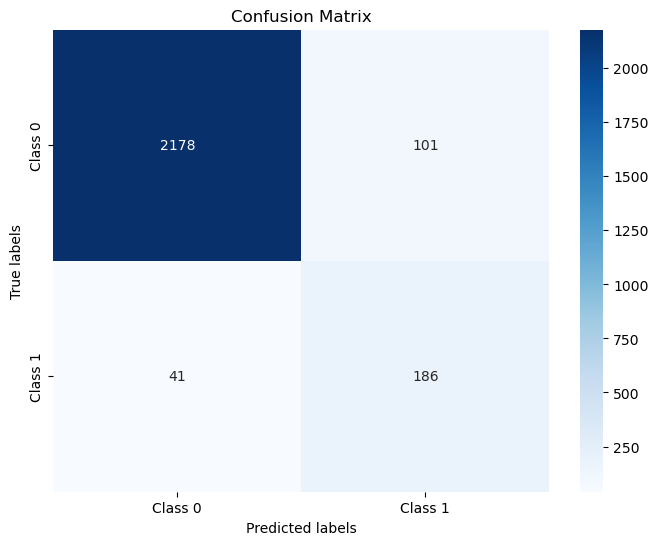

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Q12. Generate Classification error

In [72]:
classification_error = 1 - accuracy_test
print("Classification Error:", classification_error)

Classification Error: 0.056664006384676724


## Q13. Generate Classification Report

In [73]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2279
         1.0       0.65      0.82      0.72       227

    accuracy                           0.94      2506
   macro avg       0.81      0.89      0.85      2506
weighted avg       0.95      0.94      0.95      2506



## Q14. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [74]:
class_probabilities = model.predict_proba(X_test)
probabilities_df = pd.DataFrame(class_probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])
print(probabilities_df)

      Probability_Class_0  Probability_Class_1
0                0.999971         2.926897e-05
1                1.000000         5.329342e-08
2                1.000000         9.258256e-11
3                1.000000         5.051226e-08
4                0.000003         9.999965e-01
...                   ...                  ...
2501             0.999998         2.274937e-06
2502             1.000000         7.189228e-08
2503             1.000000         3.031259e-07
2504             0.999997         3.387207e-06
2505             0.999999         1.045662e-06

[2506 rows x 2 columns]


## Q15.  Plot histogram of predicted probabilities

array([[<Axes: title={'center': 'Probability_Class_0'}>,
        <Axes: title={'center': 'Probability_Class_1'}>]], dtype=object)

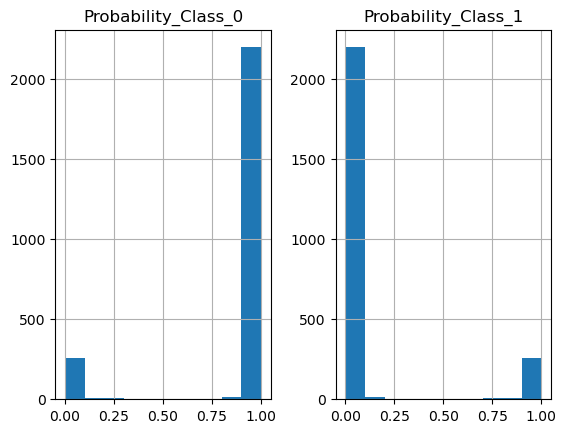

In [75]:
probabilities_df.hist()

## Q16. Plot ROC Curve

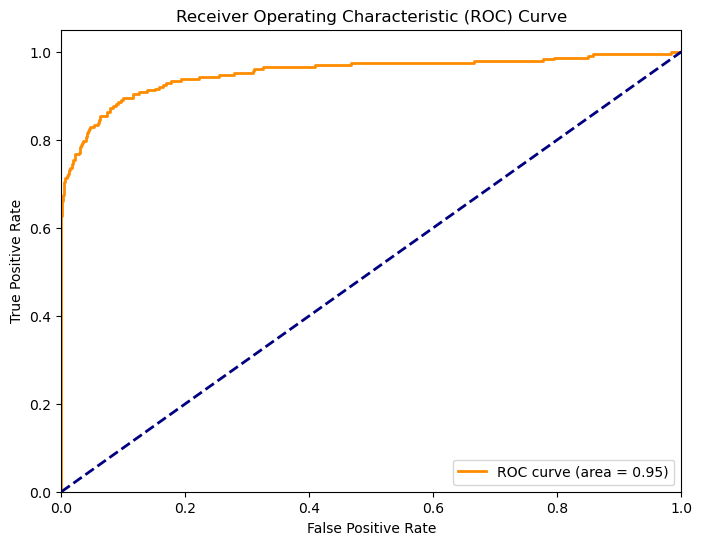

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Q17. Compute ROC AUC

In [77]:
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9520308969271245


## Q18. Calculate cross-validated ROC AUC

In [78]:
from sklearn.model_selection import cross_val_score
cv_roc_auc_scores = cross_val_score(model, x, y, cv=5, scoring='roc_auc')

print("Cross-validated ROC AUC scores:", cv_roc_auc_scores)
print("Mean ROC AUC score:", cv_roc_auc_scores.mean())

Cross-validated ROC AUC scores: [0.94777794 0.95602112 0.95042291 0.96254658 0.95079408]
Mean ROC AUC score: 0.9535125255696684


## Q19.  Applying 10-Fold Cross Validation

In [79]:
cv_scores = cross_val_score(model, x_scaled, y, cv=10)
print("Cross-validated scores:", cv_scores)

Cross-validated scores: [0.94173982 0.94732642 0.9481245  0.94014366 0.9377494  0.94094174
 0.94732642 0.95450918 0.93610224 0.94648562]


## Q20. Compute the Average cross-validation score

In [80]:
print("Mean score:", np.mean(cv_scores))


Mean score: 0.9440448992705047
